<h1 style="font-size:30px;">1) Recreating images in the output:</h1>

<h1 style="font-size:30px;">Data preparation</h1>


<h1 style="font-size:15px;">Loading the data</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

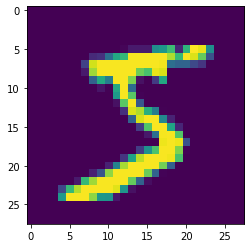

In [7]:
plt.imshow(x_train[0])


<h1 style="font-size:15px;">Scaling and transformation</h1>

In [8]:
x_train = x_train / 255
x_test = x_test / 255


<h1 style="font-size:30px;">Model</h1>

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [11]:
#mnist data:
28*28

784

In [12]:
784/2

392.0

In [14]:
# x_train.shape
x_train[0].shape

(28, 28)

In [15]:
#encoder model:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28, 28])) #because we are working with image data.  #input_shape = [28, 28]): so that if we use other image dataset than 'mnist', we make sure that all of them has the same size as the input.
encoder.add(Dense(units = 400, activation = 'relu'))
encoder.add(Dense(units = 200, activation = 'relu'))
encoder.add(Dense(units = 100, activation = 'relu'))
encoder.add(Dense(units = 50, activation = 'relu'))
encoder.add(Dense(units = 25, activation = 'relu'))

In [20]:
#decoder model:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation ='relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(784, activation = 'sigmoid')) #because we just want to check "is the output image same as the input image??" -> it is Yes or No. -> loss = 'binary_crossentropy', 'activation = sigmoid'
decoder.add(Reshape([28, 28]))

In [21]:
autoencoder = Sequential([encoder, decoder])

In [22]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = SGD(learning_rate = 1.5), metrics = ['accuracy'])

In [23]:
autoencoder.fit(x = x_train, y = x_train, epochs = 5, validation_data = [x_test, x_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 38s 635us/sample - loss: 0.2437 - accuracy: 0.7918 - val_loss: 0.1963 - val_accuracy: 0.7981
Epoch 2/5
60000/60000 [==============================] - 26s 435us/sample - loss: 0.1777 - accuracy: 0.7990 - val_loss: 0.1604 - val_accuracy: 0.8014
Epoch 3/5
60000/60000 [==============================] - 32s 534us/sample - loss: 0.1575 - accuracy: 0.8024 - val_loss: 0.1512 - val_accuracy: 0.8039
Epoch 4/5
60000/60000 [==============================] - 28s 460us/sample - loss: 0.1482 - accuracy: 0.8039 - val_loss: 0.1419 - val_accuracy: 0.8039
Epoch 5/5
60000/60000 [==============================] - 26s 438us/sample - loss: 0.1414 - accuracy: 0.8055 - val_loss: 0.1386 - val_accuracy: 0.8060


<h1 style="font-size:30px;">Prediction</h1>

In [24]:
passed_images = autoencoder.predict(x_test[:10])

In [25]:
passed_images.shape

(10, 28, 28)

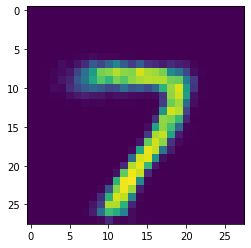

In [32]:
plt.imshow(passed_images[0])

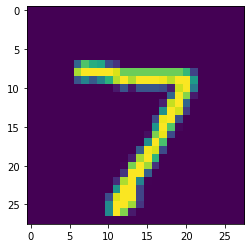

In [35]:
plt.imshow(x_test[0])

original image:


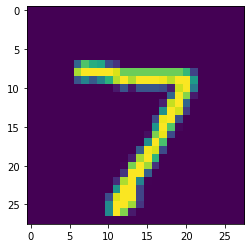

passes image:


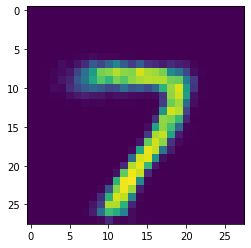

In [66]:
#or in a more beautiful sense!:
n = 0

print("original image:")
plt.imshow(x_test[n])
plt.show()
print("passes image:")
plt.imshow(passed_images[n])

In [39]:
#as we can see above, the 'passed_images' is blurrier.


<h1 style="font-size:30px;">2) Denoising the images:</h1>

In [48]:
from tensorflow.keras.layers import GaussianNoise

In [49]:
sample = GaussianNoise(stddev = 0.2)

In [50]:
noisy_images = sample(x_test[:10], training = True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [52]:
noisy_images.shape

TensorShape([10, 28, 28])

In [53]:
#the above warning is unimportant now.

original image:


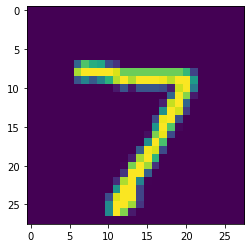

noisy image:


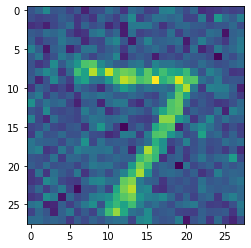

In [67]:
n = 0

print("original image:")
plt.imshow(x_test[n])
plt.show()
print("noisy image:")
plt.imshow(noisy_images[n])

In [56]:
#as we can see above, the 'noisy_image' is the noisy version of the original image.

In [57]:
import tensorflow as tf

In [58]:
#encoder model:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape = [28, 28])) #because we are working with image data.  #input_shape = [28, 28]): so that if we use other image dataset than 'mnist', we make sure that all of them has the same size as the input.

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(units = 400, activation = 'relu'))
encoder.add(Dense(units = 200, activation = 'relu'))
encoder.add(Dense(units = 100, activation = 'relu'))
encoder.add(Dense(units = 50, activation = 'relu'))
encoder.add(Dense(units = 25, activation = 'relu'))

In [59]:
#decoder model:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation ='relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(784, activation = 'sigmoid')) #because we just want to check "is the output image same as the input image??" -> it is Yes or No. -> loss = 'binary_crossentropy', 'activation = sigmoid'
decoder.add(Reshape([28, 28]))

In [60]:
noise_remover = Sequential([encoder, decoder])

In [62]:
noise_remover.compile(loss = 'binary_crossentropy', optimizer = SGD(learning_rate = 1.5), metrics = ['accuracy'])

In [63]:
noise_remover.fit(x = x_train, y = x_train, epochs = 5, validation_data = [x_test, x_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 35s 575us/sample - loss: 0.2555 - accuracy: 0.7917 - val_loss: 0.2352 - val_accuracy: 0.7859
Epoch 2/5
60000/60000 [==============================] - 22s 361us/sample - loss: 0.1964 - accuracy: 0.7963 - val_loss: 0.1690 - val_accuracy: 0.7991
Epoch 3/5
60000/60000 [==============================] - 20s 338us/sample - loss: 0.1624 - accuracy: 0.8016 - val_loss: 0.1512 - val_accuracy: 0.8024
Epoch 4/5
60000/60000 [==============================] - 20s 339us/sample - loss: 0.1512 - accuracy: 0.8038 - val_loss: 0.1473 - val_accuracy: 0.8002
Epoch 5/5
60000/60000 [==============================] - 21s 344us/sample - loss: 0.1426 - accuracy: 0.8056 - val_loss: 0.1341 - val_accuracy: 0.8058


<h1 style="font-size:30px;">Prediction</h1>

In [64]:
ten_noisy_images = sample(x_test[:10], training = True)

In [65]:
denoised = noise_remover(ten_noisy_images)

In [69]:
denoised.shape

TensorShape([10, 28, 28])

original image:


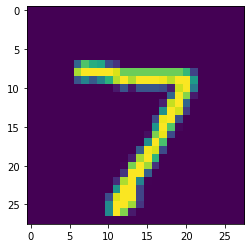

noise added image:


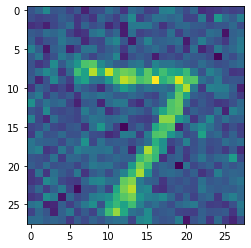

after noise removal from autoencoder


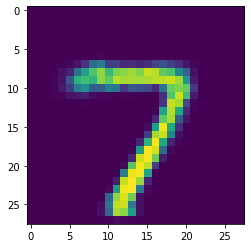

In [70]:
n = 0

print("original image:")
plt.imshow(x_test[n])
plt.show()
print("noise added image:")
plt.imshow(noisy_images[n])
plt.show()
print("after noise removal from autoencoder")
plt.imshow(denoised[n])
plt.show()